ETAPE1

Installation les bibliothèques nécessaires 

In [179]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Recupérer le contenu de l'url

In [182]:
url = "https://www.worldometers.info/world-population/population-by-country"
reponse = requests.get(url)
soup = BeautifulSoup(reponse.content, "html.parser")

In [183]:
print(soup.prettify()[:1000])  # Affiche les 1000 premiers caractères du HTML

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2024) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="ap

Sauvegarde des données extraites en format CSV

In [187]:
table_html = soup.div.next_sibling.next_sibling.next_sibling.table
df = pd.read_html(str(table_html))[0]
print(df)

df.to_csv('table.csv', index=False)


       # Country (or dependency)  Population  (2024) Yearly  Change  \
0      1                   India          1450935791         0.89 %   
1      2                   China          1419321278        -0.23 %   
2      3           United States           345426571         0.57 %   
3      4               Indonesia           283487931         0.82 %   
4      5                Pakistan           251269164         1.52 %   
..   ...                     ...                 ...            ...   
229  230              Montserrat                4389        -0.70 %   
230  231        Falkland Islands                3470        -0.20 %   
231  232                 Tokelau                2506         4.55 %   
232  233                    Niue                1819         0.11 %   
233  234                Holy See                 496         0.00 %   

     Net  Change  Density  (P/Km²)  Land Area  (Km²)  Migrants  (net)  \
0       12866195               488           2973190          -630830   
1

C:\Users\marti\AppData\Local\Temp\ipykernel_15196\216213766.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]


In [189]:
##Visulaisation des données
df

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4389,-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,3470,-0.20 %,-7,0,12170,-13,1.7,42,68 %,0.00 %
231,232,Tokelau,2506,4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,1819,0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [191]:
lien = []
base_url = 'https://www.worldometers.info'
for ele in soup.div.next_sibling.next_sibling.next_sibling.table.find_all('a'):
    if ele.get('href'):
        lien_complet = base_url + ele.get('href')
        lien.append(lien_complet)

bd = pd.DataFrame(lien, columns=["Links"])
print(bd)


                                                 Links
0    https://www.worldometers.info/world-population...
1    https://www.worldometers.info/world-population...
2    https://www.worldometers.info/world-population...
3    https://www.worldometers.info/world-population...
4    https://www.worldometers.info/world-population...
..                                                 ...
229  https://www.worldometers.info/world-population...
230  https://www.worldometers.info/world-population...
231  https://www.worldometers.info/world-population...
232  https://www.worldometers.info/world-population...
233  https://www.worldometers.info/world-population...

[234 rows x 1 columns]


Index(['#', 'Country_(or_dependency)', 'Population__(2024)', 'Yearly__Change',
       'Net__Change', 'Density__(P/Km²)', 'Land_Area__(Km²)',
       'Migrants__(net)', 'Fert.__Rate', 'Med.__Age', 'Urban__Pop_%',
       'World__Share'],
      dtype='object')


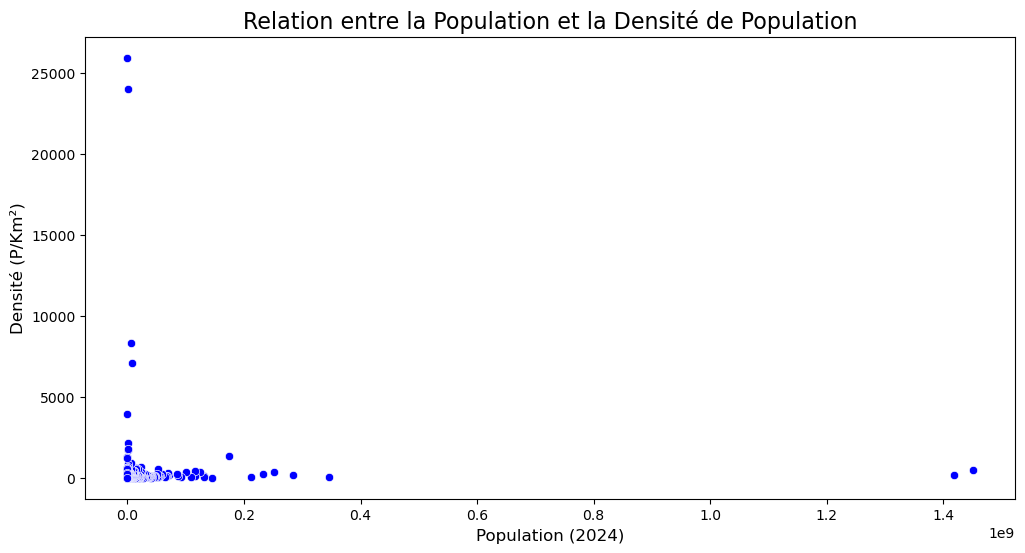

In [193]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population__(2024)', y='Density__(P/Km²)', data=df, color='blue', marker='o')

plt.title('Relation entre la Population et la Densité de Population', fontsize=16)
plt.xlabel('Population (2024)', fontsize=12)
plt.ylabel('Densité (P/Km²)', fontsize=12)
plt.show()

PARTIE2


Extration des données historiques

In [195]:
all_data = []
for liens in lien:
    response = requests.get(liens)
    soup = BeautifulSoup(response.content, 'html.parser')
    table_html = soup.find_all('table')[1]  
    df = pd.read_html(str(table_html))[0]
    df['Pays'] = liens.split('/')[4].replace('-population', '').title()  
    all_data.append(df)

base = pd.concat(all_data, ignore_index=True)

print(base)
base.to_csv('world_population_data.csv', index=False)


C:\Users\marti\AppData\Local\Temp\ipykernel_15196\2279181981.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\2279181981.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\2279181981.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\2279181981.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version.

        Year    Population Yearly % Change  Yearly  Change  Migrants (net)  \
0     2024.0  1.450936e+09          0.89 %      12866195.0       -630830.0   
1     2023.0  1.438070e+09          0.89 %      12646384.0       -979179.0   
2     2022.0  1.425423e+09          0.79 %      11219316.0      -1353478.0   
3     2020.0  1.402618e+09          0.98 %      13587383.0        -73806.0   
4     2015.0  1.328024e+09          1.32 %      16908587.0       -655085.0   
...      ...           ...             ...             ...             ...   
4133  1975.0  7.330000e+02         -0.32 %            -2.0             NaN   
4134  1970.0  7.450000e+02         -3.43 %           -28.0             NaN   
4135  1965.0  8.870000e+02         -0.68 %            -6.0             NaN   
4136  1960.0  9.180000e+02          0.15 %             1.0             NaN   
4137  1955.0  9.110000e+02          0.69 %             6.0             NaN   

      Median Age  Fertility Rate  Density (P/Km²) Urban  Pop % 

In [196]:
df

,Year,Population,Yearly % Change,Yearly Change,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Holy See Global Rank,Pays
0,2024,496,0 %,0,1240,N.A.,N.A.,0.00 %,8161972572,234,Holy-See
1,2023,496,-1.98 %,-10,1240,N.A.,N.A.,0.00 %,8091734930,234,Holy-See
2,2022,506,-2.5 %,-13,1265,N.A.,N.A.,0.00 %,8021407192,234,Holy-See
3,2021,519,-1.7 %,-9,1298,N.A.,N.A.,0.00 %,7954448391,234,Holy-See
4,2020,528,-1.49 %,-8,1320,N.A.,N.A.,0.00 %,7887001292,234,Holy-See
5,2019,536,-1.65 %,-9,1340,N.A.,N.A.,0.00 %,7811293698,234,Holy-See
6,2018,545,-1.8 %,-10,1363,N.A.,N.A.,0.00 %,7729902781,234,Holy-See
7,2017,555,-1.42 %,-8,1388,N.A.,N.A.,0.00 %,7645617954,234,Holy-See
8,2016,563,-1.57 %,-9,1408,N.A.,N.A.,0 %,7558554526,234,Holy-See
9,2015,572,-1.63 %,-10,1430,N.A.,N.A.,0 %,7470491872,234,Holy-See


PARTIE2

In [198]:
all_data = []
for liens in lien:
    response = requests.get(liens)
    soup = BeautifulSoup(response.content, 'html.parser')
    table_html = soup.find_all('table')[1]  
    df = pd.read_html(str(table_html))[0]
    df['Pays'] = liens.split('/')[4].replace('-population', '').title()  
    all_data.append(df)

base = pd.concat(all_data, ignore_index=True)

base.to_csv('population_data.csv', index=False)


C:\Users\marti\AppData\Local\Temp\ipykernel_15196\3296184276.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\3296184276.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\3296184276.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_html))[0]
C:\Users\marti\AppData\Local\Temp\ipykernel_15196\3296184276.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version.

In [199]:
base

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,...,Wallis and Futuna Global Rank,St. Barth Global Rank,Tuvalu Global Rank,Saint Pierre Miquelon Global Rank,Saint Helena Global Rank,Montserrat Global Rank,Falkland Islands Global Rank,Tokelau Global Rank,Niue Global Rank,Holy See Global Rank
0,2024.0,1.450936e+09,0.89 %,12866195.0,-630830.0,28.4,1.96,488.0,36.6 %,530387142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,1.438070e+09,0.89 %,12646384.0,-979179.0,28.1,1.98,484.0,36.0 %,518239122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0,1.425423e+09,0.79 %,11219316.0,-1353478.0,27.7,1.99,479.0,35.5 %,506304869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,1.402618e+09,0.98 %,13587383.0,-73806.0,27.0,2.05,472.0,34.4 %,483098640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015.0,1.328024e+09,1.32 %,16908587.0,-655085.0,25.3,2.29,447.0,32.3 %,429069459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,1975.0,7.330000e+02,-0.32 %,-2.0,NaN,NaN,NaN,1833.0,99.3 %,728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0
4134,1970.0,7.450000e+02,-3.43 %,-28.0,NaN,NaN,NaN,1863.0,86.4 %,644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0
4135,1965.0,8.870000e+02,-0.68 %,-6.0,NaN,NaN,NaN,2218.0,N.A.,N.A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0
4136,1960.0,9.180000e+02,0.15 %,1.0,NaN,NaN,NaN,2295.0,98.7 %,906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0


Statistiques descriptives de la base de données

La base de données contien 4138 observations avec 248 collonnes
Les années partent de 1955 à 2024
On a également une population moyenne de 3.095031e+05 avec en moyenne 7.209400e+01 migrants

In [201]:
print(base.describe()) 

              Year    Population  Yearly  Change  Migrants (net)   Median Age  \
count  4131.000000  4.131000e+03    4.131000e+03    3.383000e+03  3383.000000   
mean   1994.770274  2.339536e+07    3.095031e+05    7.209400e+01    24.393852   
std      22.810637  1.036656e+08    1.316007e+06    1.858554e+05     8.439279   
min    1955.000000  4.960000e+02   -3.315930e+06   -5.699445e+06    12.600000   
25%    1975.000000  1.739430e+05    7.145000e+02   -1.468300e+04    17.300000   
50%    1995.000000  3.240968e+06    2.925600e+04   -1.034000e+03    21.300000   
75%    2018.000000  1.176186e+07    1.887940e+05    7.753000e+03    30.700000   
max    2024.000000  1.450936e+09    1.997865e+07    1.722127e+06    49.400000   

       Fertility Rate  Density (P/Km²)  World Population  India Global Rank  \
count     3383.000000      4131.000000      4.131000e+03          17.000000   
mean         3.804957       379.199225      5.771083e+09           1.823529   
std          2.017373      1971.0

Visualisation et prédiction

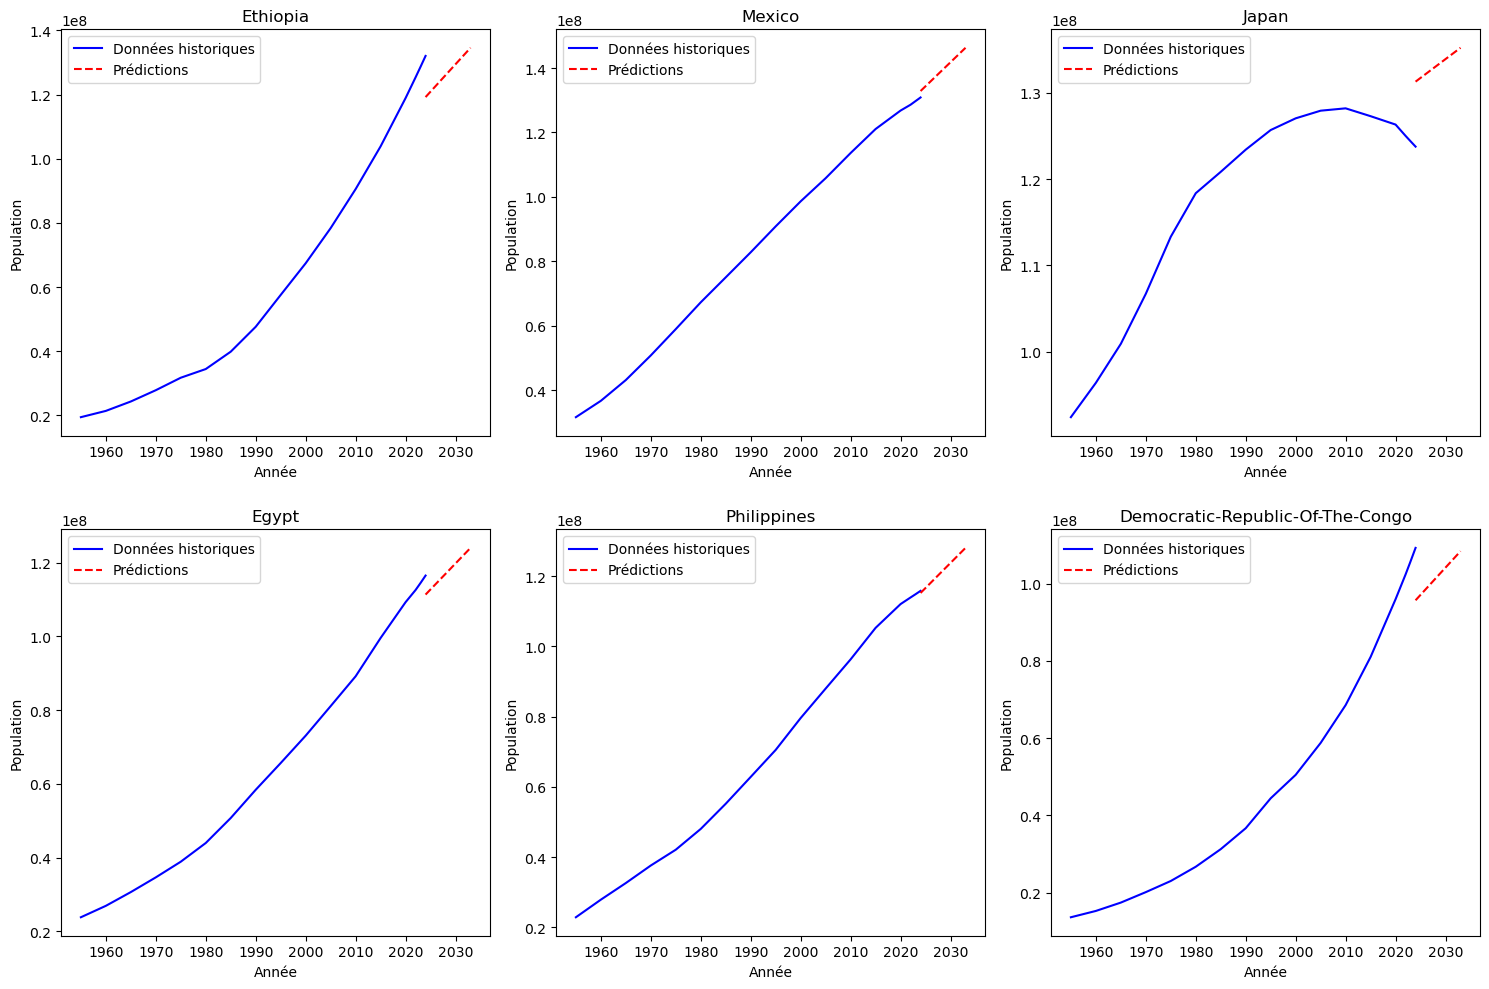

Prédiction de la population mondiale pour 2024.0: 95704460
Prédiction de la population mondiale pour 2025.0: 97117039
Prédiction de la population mondiale pour 2026.0: 98529619
Prédiction de la population mondiale pour 2027.0: 99942198
Prédiction de la population mondiale pour 2028.0: 101354778
Prédiction de la population mondiale pour 2029.0: 102767357
Prédiction de la population mondiale pour 2030.0: 104179937
Prédiction de la population mondiale pour 2031.0: 105592516
Prédiction de la population mondiale pour 2032.0: 107005096
Prédiction de la population mondiale pour 2033.0: 108417676


In [216]:
# Nombre de sous-graphiques
n_countries = len(top_countries)
rows = (n_countries + 2) // 3  # Calcul du nombre de lignes pour un affichage équilibré

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Créer les sous-graphiques
axes = axes.flatten()  # Aplatir les axes pour une boucle simple

for i, country in enumerate(top_countries):
    country_data = base[base['Pays'] == country].sort_values('Year')
    historical_years = country_data['Year']
    historical_population = country_data['Population']

    X = historical_years.values.reshape(-1, 1)
    y = historical_population.values
    model.fit(X, y)

    future_years = np.arange(historical_years.max(), historical_years.max() + 10).reshape(-1, 1)
    predictions = model.predict(future_years)

    # Graphique des données historiques
    axes[i].plot(historical_years, historical_population, label='Données historiques', color='blue')

    # Graphique des prédictions
    axes[i].plot(future_years, predictions, label='Prédictions', color='red', linestyle='--')

    # Titre et légendes
    axes[i].set_title(f"{country}", fontsize=12)
    axes[i].set_xlabel('Année')
    axes[i].set_ylabel('Population')
    axes[i].legend()

# Supprimer les axes inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Afficher les prédictions
for year, pred in zip(future_years.flatten(), predictions):
    print(f"Prédiction de la population mondiale pour {year}: {pred:.0f}")

On remarque que la population mondiale va continuer à croite dans les 10 prochaine années

In [162]:
##Pour ce code le resulatat obtenu n'est pas convaincant

# Définir les caractéristiques (X) et la cible (y)
X = base.drop(columns=['Population'])
y = base['Population']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des tailles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (3310, 247)
Taille de l'ensemble de test : (828, 247)
